# **KNN Breast Cancer Wisconsin**

#### **Importando bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import scipy as scp

from sklearn import datasets

#### **Importando o dataset**

In [3]:
filename = 'wdbc.data'
df = pd.read_csv(filename, index_col=False, header=None)
#df.index() = ['ID Number', 'Tipo']
other_names = list(np.arange(0,30))
other_names.insert(0, 'Diagnosis')
other_names.insert(0, 'ID_Number')
df = df.set_axis(other_names, axis= 'columns', inplace=False)
df.head()

,ID_Number,Diagnosis,0,1,2,3,4,5,6,7,...,20,21,22,23,24,25,26,27,28,29
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID_Number  569 non-null    int64  
 1   Diagnosis  569 non-null    object 
 2   0          569 non-null    float64
 3   1          569 non-null    float64
 4   2          569 non-null    float64
 5   3          569 non-null    float64
 6   4          569 non-null    float64
 7   5          569 non-null    float64
 8   6          569 non-null    float64
 9   7          569 non-null    float64
 10  8          569 non-null    float64
 11  9          569 non-null    float64
 12  10         569 non-null    float64
 13  11         569 non-null    float64
 14  12         569 non-null    float64
 15  13         569 non-null    float64
 16  14         569 non-null    float64
 17  15         569 non-null    float64
 18  16         569 non-null    float64
 19  17         569 non-null    float64
 20  18        

In [5]:
df.describe().to_excel('describe.xlsx')

#### **Verificando registros nulos**

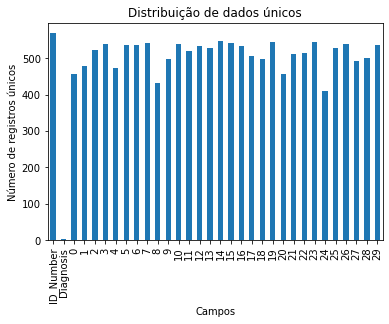

In [6]:
def distribution(df):
  num_unique_labels = df.apply(pd.Series.nunique) #Return number of unique elements in the object (Excludes NA values by default)
  num_unique_labels.plot( kind='bar')

  plt.xlabel('Campos')
  plt.ylabel('Número de registros únicos')
  plt.title('Distribuição de dados únicos')
  plt.show()

distribution(df)

#### **Análise de distribuição dos dados da classe y --> (b = benigno e m = maligno)**

Benigno:  357
Maligno:  212


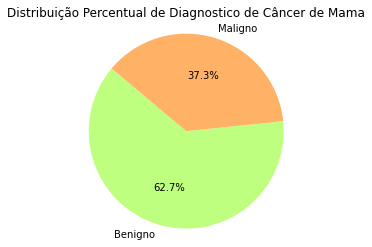

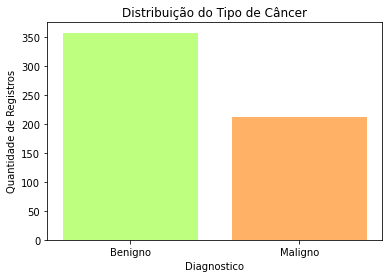

In [7]:
B = pd.value_counts(df['Diagnosis']) [0]
M = pd.value_counts(df['Diagnosis']) [1]

tam = len(df)

print('Benigno: ', B)
print('Maligno: ', M)

pie = pd.DataFrame([['Benigno', B], ['Maligno', M]], columns=['Diagnostico', 'Quantidade'])

def pie_chart(df, col1, col2, title):
  labels = {'Benigno': 0, 'Maligno': 1}
  sizes = df[col2]
  colors = ['#beff80', '#ffb266']

  plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140, labeldistance=1.1)

  plt.title( title )
  plt.axis('equal')
  plt.savefig('pie_chart',facecolor='w', edgecolor='w', format='png')
  plt.show()

pie_chart(pie, 'Diagnostico', 'Quantidade', 'Distribuição Percentual de Diagnostico de Câncer de Mama')


plt.bar(pie.Diagnostico, pie.Quantidade, color = ['#beff80', '#ffb266'])
plt.title('Distribuição do Tipo de Câncer')
plt.xlabel('Diagnostico')
plt.ylabel('Quantidade de Registros')
plt.savefig('bar_graph',facecolor='w', edgecolor='w', format='png')
plt.show()

#### **Split do Dataset**

In [8]:
# X = variaveis independentes
# y = variaveis dependentes

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [9]:
X.head()

,ID_Number,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### **Importando encoder para transformar as labels(M e B) em chaves numéricas**

In [10]:
from sklearn.preprocessing import OneHotEncoder
Oht_enc = OneHotEncoder()
X = pd.DataFrame(Oht_enc.fit_transform(X).A)

In [11]:
X.shape

(569, 15909)

#### **Train test split**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None, stratify = y)

In [13]:
y_test

402    B
39     M
357    B
57     M
464    B
      ..
6      M
459    B
300    M
352    M
533    M
Name: Diagnosis, Length: 171, dtype: object

#### **Feature scalling**

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X.train = scaler.transform(X_train)
X.test = scaler.transform(X_test)

<ipython-input-14-d0272aa564b0>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.train = scaler.transform(X_train)
<ipython-input-14-d0272aa564b0>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.test = scaler.transform(X_test)


#### **Criando KNN model**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform')


KNeighborsClassifier()

#### **Prevendo os valores de y para os dados de teste**

In [16]:
y_pred = classifier.predict(X_test)

#### **Análise dos resultados**

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
print('Matriz Confusão: ')
print(confusion_matrix(y_test, y_pred), "\n")

print('Relatório de classifição: \n', classification_report(y_test, y_pred))

print('Acurácia do modelo: ', accuracy_score(y_test, y_pred))

Matriz Confusão: 
[[93 14]
 [30 34]] 

Relatório de classifição: 
               precision    recall  f1-score   support

           B       0.76      0.87      0.81       107
           M       0.71      0.53      0.61        64

    accuracy                           0.74       171
   macro avg       0.73      0.70      0.71       171
weighted avg       0.74      0.74      0.73       171

Acurácia do modelo:  0.7426900584795322


#### **Aplicando loop para diferentes valores de k**

In [21]:
error = []

for i in range(1, 10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))

#### **Comparando error rate gerado**

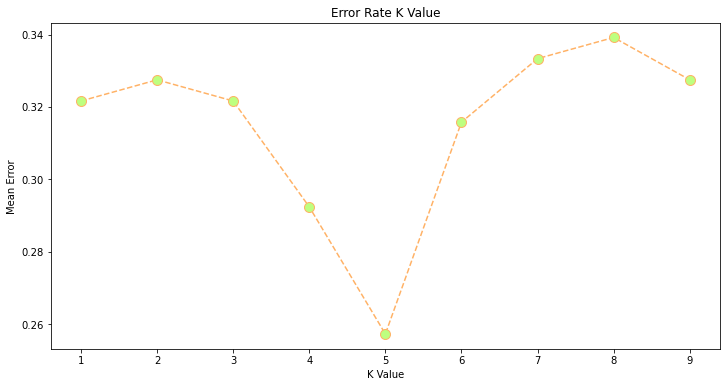

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='#ffb266', linestyle='dashed', marker='o', markerfacecolor='#beff80', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')
plt.savefig('Error Rate K value',facecolor='w', edgecolor='w', format='png')

#### **Aplicando melhor parâmetro K calculado**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=1, p=2, weights='uniform')

KNeighborsClassifier(n_neighbors=1)

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Matriz Confusa: ")
print(confusion_matrix(y_test, y_pred), "\n")  

print("Relatório de classificação: \n", classification_report(y_test, y_pred))  

print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred))

Matriz Confusa: 
[[97 10]
 [46 18]] 

Relatório de classificação: 
               precision    recall  f1-score   support

           B       0.68      0.91      0.78       107
           M       0.64      0.28      0.39        64

    accuracy                           0.67       171
   macro avg       0.66      0.59      0.58       171
weighted avg       0.67      0.67      0.63       171

Acurácia do modelo:  0.672514619883041


####

In [24]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [27]:
scores_list = []
for k in range(1,11):
    scores = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X,y)
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train,y_train)
        accuracy = model.score(X_test,y_test)
        scores.append(accuracy)
    scores_list.append(np.mean(scores))

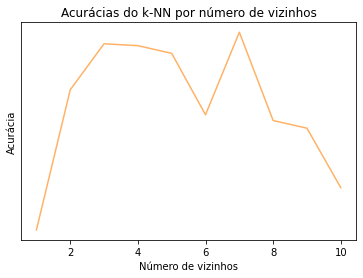

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(np.arange(1,11), scores_list, color= '#ffb266')
plt.yticks([])
plt.title('Acurácias do k-NN por número de vizinhos')
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia')
plt.savefig('Acurácias do k-NN por número de vizinhos', facecolor='w', edgecolor='w', format='png')

#### **Criando o csv com a lista de scores**

In [59]:
k = list(np.arange(1,11))
df = pd.DataFrame(scores_list, columns=['accuracy'])
df.index = k
csv_data = df.to_csv('file_scores_kNN.csv', index=True, index_label='tests')